In [1]:
from citipy import citipy
from random import uniform
import pandas as pd
import numpy as np
import csv
import random
import matplotlib.pyplot as plt
import requests
import json
from datetime import datetime as dt

from config import maps_key, place_key, api_key

Overall, the maximum temperture increases as the latitude gets closer to 0. The temperature decreases as the latitude gets further from 0. Since 0 is where the equator is, this suggests that temperature is hotter by the equator!


There are not many trends shown in the other graphs. It does not seem like there is much of a correlation between humidity and latitude. 

Longitude vs. Temperature has a similar trend to latitude vs. temperature. In both cases, the temperature decreases as long/lat gets further from 0. 

In [2]:
##generate random lat, long

city = {}
cities = []
#country = []
def newpoint():
    return uniform(-180,180), uniform(-90, 90)

while len(cities) < 850:
    points = []
    points = list((newpoint() for x in range(850)))
    for i in range(len(points)):
        lat = points[i][0]
        long = points[i][1]
        city[citipy.nearest_city(lat,long).city_name] = points[i]
#        country.append(citipy.nearest_city(lat,long).country_code)
    cities = list(set(city))
    

In [ ]:
## the generated lat and long are not exactly where the city is. 

In [3]:
a = list(city.keys())

city_df = pd.DataFrame([city for city in a], columns=["City"])


In [ ]:

##This code uses the randomly generated lat and long and puts it in the dataframe
##however, the lat and long are not totally accurate

# for index, row in city_df.iterrows():
#     lat = city[a[index]][0]
#     long = city[a[index]][1]
#    # country1 = country[index]
#     city_df.set_value(index, "Lat", lat)
#     city_df.set_value(index, "Long", long)
# #    city_df.set_value(index, "Country", country1)

In [ ]:
##When doinng the following for-loop, some of the cities are not recognized, which is why 850 are generated, then 500 are sampled

In [4]:

city_df["Country"] = ""
city_df["Lat"] = ""
city_df["Long"] = ""
for index, row in city_df.iterrows():
    target_city = city_df["City"][index]
    target_url = "https://maps.googleapis.com/maps/api/geocode/json?" \
    "address=%s&key=%s" % (target_city, maps_key)
    geo_data = requests.get(target_url).json()
    try:
        lat = geo_data["results"][0]["geometry"]["location"]["lat"]
        lng = geo_data["results"][0]["geometry"]["location"]["lng"]
    except IndexError:
        lat = np.NaN
        lng = np.NaN
    
    try:
        country = geo_data["results"][0]["address_components"][3]["long_name"]
    except IndexError:
        country = "some weird country"
        continue
    #print("settings values " +city_df["City"][index])
    city_df.set_value(index, "Country", country)
    city_df.set_value(index, "Lat", lat)
    city_df.set_value(index, "Long", lng)

In [16]:
#geo_data
city_df["Lat"].replace("",np.NaN, inplace =True)

In [20]:


##Get rid of the ones that cannot find a country or lat long
city_df1 = city_df1.dropna(axis = 0,how = "any",inplace = False)
# city_df["Country"].dtype
len(city_df1)



669

In [21]:
city_df1

,City,Country,Lat,Long
0,bargal,Somalia,11.285478,51.0763
2,port alfred,South Africa,-33.586407,26.8851
4,victoria,United States,28.805267,-97.0036
5,ejura,Ghana,7.384720,-1.35898
7,belushya guba,Russia,71.545556,52.3203
8,ushuaia,Argentina,-54.801912,-68.303
11,tsihombe,Madagascar,-25.316847,45.4863
12,east london,South Africa,-33.029158,27.8546
17,amderma,Russia,69.751221,61.6637
19,george,South Africa,-33.988128,22.453


In [22]:

city_df_sample = city_df1
city_df1["Temp"] = ""
city_df1["Humidity"] = ""
city_df1["Date"] = ""
city_df1["Wind Speed"] = ""
city_df1["Cloudiness"] = ""



In [23]:
##Using the weather api

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"




In [24]:
##Sometimes the weather api does not recognize some of the cities, in that case, a NaN is put in that place
count = 0
for index, row in city_df1.iterrows():
    target_url = "http://api.openweathermap.org/data/2.5/weather?units=%s&APPID=%s&q=%s" % (units,api_key, row['City'])
    cities_weather = requests.get(target_url).json()
    try:
        city_df1.set_value(index, "Temp", cities_weather["main"]["temp_max"])
        city_df1.set_value(index, "Humidity", cities_weather["main"]["humidity"])
        city_df1.set_value(index, "Date", cities_weather["dt"])
        city_df1.set_value(index, "Wind Speed", cities_weather["wind"]["speed"])
        city_df1.set_value(index, "Cloudiness", cities_weather["clouds"]["all"])
    except KeyError:
        city_df1.set_value(index, "Temp", np.NaN)
        city_df1.set_value(index, "Humidity", np.NaN)
        city_df1.set_value(index, "Date",np.NaN)
        city_df1.set_value(index, "Wind Speed", np.NaN)
        city_df1.set_value(index, "Cloudiness", np.NaN)
        continue
        
    count = count + 1
       
    print("------------------------")
    print("Processing Information: " , count, 'With City: ' , cities_weather["name"])
    print(target_url)

------------------------
Processing Information:  1 With City:  Port Alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=796fc7786f1ced770caae62b2b4d5d7b&q=port alfred
------------------------
Processing Information:  2 With City:  Victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=796fc7786f1ced770caae62b2b4d5d7b&q=victoria
------------------------
Processing Information:  3 With City:  Ejura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=796fc7786f1ced770caae62b2b4d5d7b&q=ejura
------------------------
Processing Information:  4 With City:  Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=796fc7786f1ced770caae62b2b4d5d7b&q=ushuaia
------------------------
Processing Information:  5 With City:  East London
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=796fc7786f1ced770caae62b2b4d5d7b&q=east london
------------------------
Processing Information:  6 With City:  George


In [29]:

sample1 = city_df1.dropna(axis = 0,how="any",inplace = False)

if len(sample1)>500:
    sample1 = sample1.sample(500)

    
    
len(sample1)

500

In [30]:

Date = dt.now().strftime("(%m/%d/%Y)")



#Plots:

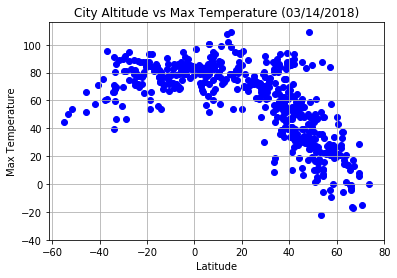

In [31]:
# Scatter Plot Lat vs Temperature
plt.scatter(sample1["Lat"], sample1["Temp"], marker="o", color = 'b')
plt.title("City Altitude vs Max Temperature " + str(Date))
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.yticks(np.arange(-40, 120, 20))
plt.grid(True)

#plt.savefig("TempCitiesLat_update.png")

plt.show()

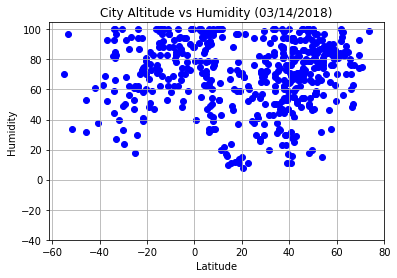

In [32]:
#Scatter PLot Lat vs Humidity

# Build a scatter plot for each data type
plt.scatter(sample1["Lat"], sample1["Humidity"], marker="o", color = 'blue')

# # Incorporate the other graph properties
plt.title("City Altitude vs Humidity " + str(Date))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.yticks(np.arange(-40, 120, 20))

# # Save the figure
#plt.savefig("HumidityitiesLat_update.png")

# Show plot
plt.show()


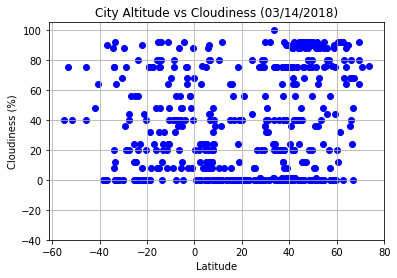

In [33]:
##Scatter plot lat vs Clouds
plt.scatter(sample1["Lat"], sample1["Cloudiness"], marker="o", color = 'blue')

plt.title("City Altitude vs Cloudiness " + str(Date))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.yticks(np.arange(-40, 120, 20))

plt.savefig("CloudLatCity_update.png")

plt.show()

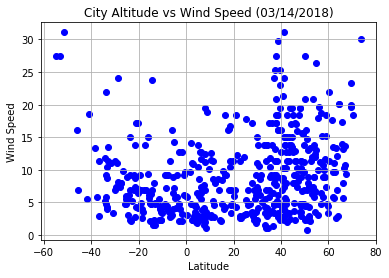

In [34]:
#Scatter plot lat vs wind

plt.scatter(sample1["Lat"], sample1["Wind Speed"], marker="o", color = 'blue')

plt.title("City Altitude vs Wind Speed " + str(Date))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)


#plt.savefig("WindLatCity_update.png")

plt.show()

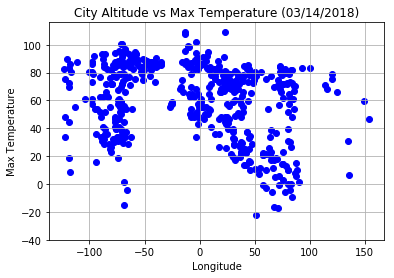

In [35]:
# Scatter Plot Long vs Temperature
plt.scatter(sample1["Long"], sample1["Temp"], marker="o", color = 'b')
plt.title("City Altitude vs Max Temperature " + str(Date))
plt.ylabel("Max Temperature")
plt.xlabel("Longitude")
plt.yticks(np.arange(-40, 120, 20))
plt.grid(True)

plt.savefig("TempCitiesLong_update.png")

plt.show()